# 데이터 탐색 및 불러오기

In [10]:
import torch

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [11]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
path = r"D:\05.gdrive\codeit\mission7\data\pet_data"
# 파일 경로 설정
trainval_file_path = os.path.join(path, "annotations", "annotations", "trainval.txt")
test_file_path = os.path.join(path, "annotations", "annotations", "test.txt")

# 이미지, Annotation 경로 설정
image_dir = os.path.join(path, "images", "images")
xml_dir = os.path.join(path, "annotations", "annotations", "xmls")

# Train/Validation 파일 읽기
df_trainval = pd.read_csv(trainval_file_path, sep="\s+", header=None)
df_trainval.columns = ["Image", "ClassID", "Species", "BreedID"]

# Test 파일 읽기
df_test = pd.read_csv(test_file_path, sep="\s+", header=None)
df_test.columns = ["Image", "ClassID", "Species", "BreedID"]

# 데이터 크기 확인
print(f"Train/Validation 데이터 수: {len(df_trainval)}")
print(f"Test 데이터 수: {len(df_test)}")

# Annotation 개수 확인
xml_files = [file for file in os.listdir(xml_dir) if file.endswith(".xml")]
print(f"XML 파일 개수: {len(xml_files)}")

Train/Validation 데이터 수: 3680
Test 데이터 수: 3669
XML 파일 개수: 3686


In [12]:
print(df_trainval.shape)
df_trainval.head()

(3680, 4)


,Image,ClassID,Species,BreedID
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1


In [13]:
print(df_test.shape)
df_test.head()

(3669, 4)


,Image,ClassID,Species,BreedID
0,Abyssinian_201,1,1,1
1,Abyssinian_202,1,1,1
2,Abyssinian_204,1,1,1
3,Abyssinian_205,1,1,1
4,Abyssinian_206,1,1,1


In [14]:
df_trainval['Species'].value_counts()

Species
2    2492
1    1188
Name: count, dtype: int64

In [15]:
df_test['Species'].value_counts()

Species
2    2486
1    1183
Name: count, dtype: int64

In [16]:
# Train과 Validation에 사용될 이미지 파일 이름 리스트 생성
trainval_list = df_trainval['Image'].tolist()

# Test에 사용될 이미지 파일 이름 리스트 생성
test_list = df_test['Image'].tolist()

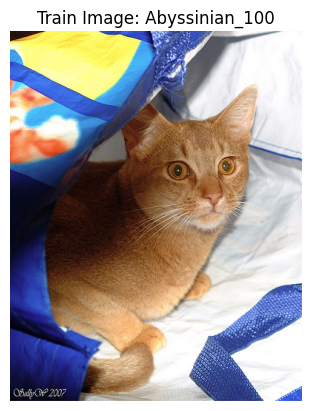

In [17]:
# Train 데이터에서 예제 이미지 불러오기
train_example_image_name = df_trainval["Image"].iloc[0]
train_image_path = os.path.join(image_dir, f"{train_example_image_name}.jpg")

# 이미지 읽기
train_image = cv2.imread(train_image_path)
train_image = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)

# Train 이미지 출력
plt.imshow(train_image)
plt.title(f"Train Image: {train_example_image_name}")
plt.axis("off")
plt.show()

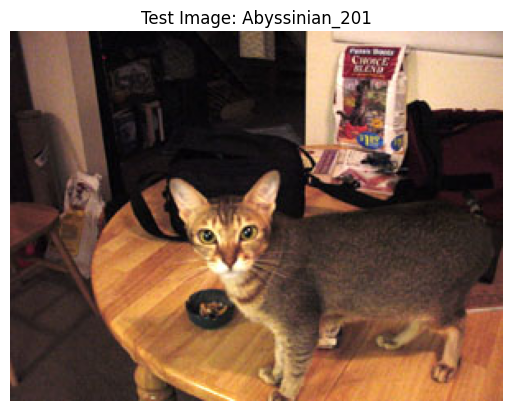

In [18]:
# Test 데이터에서 예제 이미지 불러오기
test_example_image_name = df_test["Image"].iloc[0]
test_image_path = os.path.join(image_dir, f"{test_example_image_name}.jpg")

# 이미지 읽기
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Test 이미지 출력
plt.imshow(test_image)
plt.title(f"Test Image: {test_example_image_name}")
plt.axis("off")
plt.show()

In [19]:
# XML 파일 이름 가져오기 (확장자 제거)
xml_list = [os.path.splitext(file)[0] for file in os.listdir(xml_dir) if file.endswith(".xml")]

# Train 이미지에 대해 XML 파일이 없는 경우 확인
missing_xml = [image for image in trainval_list if image not in xml_list]

# Train 이미지에 대해 XML 파일이 있는 경우 확인
trainval_list = [image for image in trainval_list if image in xml_list]

# 결과 출력
print(f"XML 파일이 없는 Train 이미지 수: {len(missing_xml)}")
print(missing_xml)

XML 파일이 없는 Train 이미지 수: 9
['Abyssinian_104', 'Bengal_111', 'samoyed_10', 'Bengal_175', 'Egyptian_Mau_14', 'Egyptian_Mau_156', 'Egyptian_Mau_186', 'Ragdoll_199', 'saint_bernard_15']


In [20]:
import xml.etree.ElementTree as ET

# 예제 XML 파일 경로
example_xml_file = os.path.join(xml_dir, xml_files[0])

# XML 파일 읽기 및 파싱
tree = ET.parse(example_xml_file)
root = tree.getroot()

# 재귀적으로 모든 태그와 데이터 출력 함수
def print_all_elements(element, indent=""):
    print(f"{indent}{element.tag}: {element.text}")
    for child in element:
        print_all_elements(child, indent + "  ")

# XML 구조 탐색
print_all_elements(root)

annotation: None
  folder: OXIIIT
  filename: Abyssinian_1.jpg
  source: None
    database: OXFORD-IIIT Pet Dataset
    annotation: OXIIIT
    image: flickr
  size: None
    width: 600
    height: 400
    depth: 3
  segmented: 0
  object: None
    name: cat
    pose: Frontal
    truncated: 0
    occluded: 0
    bndbox: None
      xmin: 333
      ymin: 72
      xmax: 425
      ymax: 158
    difficult: 0


In [21]:
# XML 파일에서 Bounding Box와 클래스 정보 추출
for obj in root.findall("object"):
    class_name = obj.find("name").text  # 클래스 이름
    bndbox = obj.find("bndbox")
    x_min = int(bndbox.find("xmin").text)
    y_min = int(bndbox.find("ymin").text)
    x_max = int(bndbox.find("xmax").text)
    y_max = int(bndbox.find("ymax").text)

    print(f"Class: {class_name}, Bounding Box: ({x_min}, {y_min}, {x_max}, {y_max})")

Class: cat, Bounding Box: (333, 72, 425, 158)


In [22]:
# 모든 XML 파일 처리
annotations = []

for xml_file in xml_files:
    xml_path = os.path.join(xml_dir, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    image_name = root.find("filename").text  # 이미지 파일 이름

    for obj in root.findall("object"):
        class_name = obj.find("name").text
        bndbox = obj.find("bndbox")
        x_min = int(bndbox.find("xmin").text)
        y_min = int(bndbox.find("ymin").text)
        x_max = int(bndbox.find("xmax").text)
        y_max = int(bndbox.find("ymax").text)

        annotations.append({
            "image": image_name,
            "class": class_name,
            "bbox": [x_min, y_min, x_max, y_max]
        })

# Object Detection 시각화

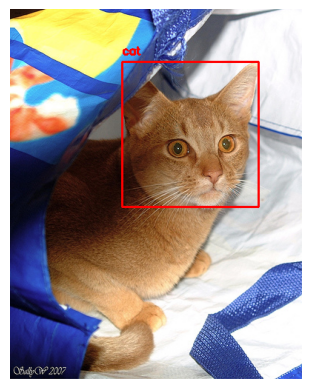

In [23]:
# Train 데이터에서 예제 이미지 불러오기
train_example_image_name = df_trainval["Image"].iloc[0]
train_image_path = os.path.join(image_dir, f"{train_example_image_name}.jpg")

# 이미지 읽기
image = cv2.imread(train_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 해당 이미지의 어노테이션 가져오기
annotations = [anno for anno in annotations if anno["image"] == f"{train_example_image_name}.jpg"]

# Bounding Box 그리기
for anno in annotations:
    x_min, y_min, x_max, y_max = anno["bbox"]
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)  # 빨간색 박스
    cv2.putText(image, anno["class"], (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# 시각화
plt.imshow(image)
plt.axis("off")
plt.show()

# 데이터셋 준비

In [24]:
from torchvision.transforms import v2

transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(dtype=torch.float32, scale=True),
    ]
)

In [25]:
from PIL import Image
from torch.utils.data import Dataset

class VOCDataset(Dataset):
    def __init__(self, image_dir, annotation_dir, classes, image_list, transforms=None):
        self.image_dir = image_dir
        self.annotation_dir = annotation_dir
        self.classes = classes
        self.transforms = transforms
        self.image_files = image_list # 미리 필터링된 유효한 이미지 파일 리스트

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # 이미지 및 XML 파일 경로 설정
        image_file = self.image_files[idx] + ".jpg"
        annotation_file = self.image_files[idx] + ".xml"
        image_path = os.path.join(self.image_dir, image_file)
        annotation_path = os.path.join(self.annotation_dir, annotation_file)

        # 이미지 로드
        image = Image.open(image_path).convert("RGB")

        # 어노테이션 로드
        boxes = []
        labels = []
        tree = ET.parse(annotation_path)
        root = tree.getroot()

        for obj in root.findall("object"):
            class_name = obj.find("name").text
            if class_name not in self.classes:
                continue
            labels.append(self.classes.index(class_name))

            bndbox = obj.find("bndbox")
            x_min = int(bndbox.find("xmin").text)
            y_min = int(bndbox.find("ymin").text)
            x_max = int(bndbox.find("xmax").text)
            y_max = int(bndbox.find("ymax").text)
            boxes.append([x_min, y_min, x_max, y_max])

        # Tensor로 변환
        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        # Transform 적용
        if self.transforms:
            image, boxes, labels = self.transforms(image, boxes, labels)

        target = {"boxes": boxes, "labels": labels}
        return image, target

In [26]:
class TestDataset(Dataset):
    def __init__(self, image_dir, image_list, transforms=None):
        self.image_dir = image_dir
        self.transforms = transforms
        self.image_files = image_list  # 테스트 이미지 리스트 (확장자 없음)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # 이미지 파일 경로
        image_file = self.image_files[idx] + ".jpg"
        image_path = os.path.join(self.image_dir, image_file)

        # 이미지 로드
        image = Image.open(image_path).convert("RGB")

        # Transform 적용
        if self.transforms:
            image = self.transforms(image)

        return image, self.image_files[idx]  # 이미지와 파일 이름 반환

In [27]:
from sklearn.model_selection import train_test_split

# Train/Validation 분리 (trainval_list에서 80% Train, 20% Validation으로 나눔)
train_list, valid_list = train_test_split(trainval_list, test_size=0.3, random_state=42)

# 결과 확인
print(f"Train 이미지 수: {len(train_list)}")
print(f"Validation 이미지 수: {len(valid_list)}")
print(f"Test 이미지 수: {len(test_list)}")

Train 이미지 수: 2569
Validation 이미지 수: 1102
Test 이미지 수: 3669


In [28]:
from torch.utils.data import DataLoader

# 클래스 정의
classes = ["background", "dog", "cat"]

# Train Dataset
train_dataset = VOCDataset(
    image_dir=image_dir,
    annotation_dir=xml_dir,
    classes=classes,
    image_list=train_list,  # Train 리스트 사용
    transforms=transform
)

# Validation Dataset
valid_dataset = VOCDataset(
    image_dir=image_dir,
    annotation_dir=xml_dir,
    classes=classes,
    image_list=valid_list,  # Validation 리스트 사용
    transforms=transform
)

# Test Dataset 생성
test_dataset = TestDataset(
    image_dir=image_dir,  # 테스트 이미지 디렉토리
    image_list=test_list,       # 테스트 이미지 리스트 (확장자 없는 이름)
    transforms=transform  # 필요하면 Transform 적용
)


# 데이터 로더 생성
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(valid_dataset, batch_size=8, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# 데이터 크기 출력
print(f"Train 데이터셋 크기: {len(train_dataset)}")
print(f"Validation 데이터셋 크기: {len(valid_dataset)}")
print(f"Test 데이터셋 크기: {len(test_dataset)}")


Train 데이터셋 크기: 2569
Validation 데이터셋 크기: 1102
Test 데이터셋 크기: 3669


# SSD 모델 준비

In [29]:
import torchvision
from torchvision.models.detection.ssd import SSD300_VGG16_Weights

# SSD 모델 불러오기
model = torchvision.models.detection.ssd300_vgg16(weights=SSD300_VGG16_Weights.DEFAULT).to(device)

# 클래스 개수에 맞게 출력 레이어 수정
num_classes = len(classes)  # background 포함
model.head.classification_head.num_classes = num_classes

# 모델 학습 및 평가

In [30]:
import numpy as np
from sklearn.metrics import average_precision_score

def calculate_iou(box, boxes):
    """
    Calculate Intersection over Union (IoU) between a box and multiple boxes.

    Args:
        box (array): Single bounding box [x_min, y_min, x_max, y_max].
        boxes (array): Array of bounding boxes [[x_min, y_min, x_max, y_max], ...].

    Returns:
        array: IoU scores for each box in `boxes`.
    """
    x_min = np.maximum(box[0], boxes[:, 0])
    y_min = np.maximum(box[1], boxes[:, 1])
    x_max = np.minimum(box[2], boxes[:, 2])
    y_max = np.minimum(box[3], boxes[:, 3])

    intersection = np.maximum(0, x_max - x_min) * np.maximum(0, y_max - y_min)
    box_area = (box[2] - box[0]) * (box[3] - box[1])
    boxes_area = (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1])
    union = box_area + boxes_area - intersection

    iou = intersection / union
    return iou


def calculate_ap(predictions, ground_truths, class_idx, iou_threshold=0.5):
    """
    특정 클래스에 대한 AP 계산.
    predictions: 모델의 예측 리스트 [{"boxes": [[x_min, y_min, x_max, y_max]], "labels": [label]}]
    ground_truths: 정답 리스트 [{"boxes": [[x_min, y_min, x_max, y_max]], "labels": [label]}]
    class_idx: 평가 대상 클래스 인덱스
    iou_threshold: IoU 기준값 (default=0.5)

    Returns:
        Average Precision (AP) 값
    """
    true_positives = []
    false_positives = []
    all_ground_truths = 0

    # 모든 예측과 정답을 순회
    for pred, gt in zip(predictions, ground_truths):
        pred_boxes = np.array(pred["boxes"])
        pred_labels = np.array(pred["labels"])
        gt_boxes = np.array(gt["boxes"])
        gt_labels = np.array(gt["labels"])

        # 현재 클래스에 해당하는 박스만 필터링
        pred_boxes = pred_boxes[pred_labels == class_idx]
        gt_boxes = gt_boxes[gt_labels == class_idx]

        all_ground_truths += len(gt_boxes)

        # IoU 계산
        detected = []
        for pred_box in pred_boxes:
            ious = []
            for gt_box in gt_boxes:
                iou = calculate_iou(pred_box, gt_box)
                ious.append(iou)

            if len(ious) > 0:
                max_iou_idx = np.argmax(ious)
                if ious[max_iou_idx] >= iou_threshold and max_iou_idx not in detected:
                    true_positives.append(1)
                    false_positives.append(0)
                    detected.append(max_iou_idx)
                else:
                    true_positives.append(0)
                    false_positives.append(1)
            else:
                false_positives.append(1)

    # Precision-Recall Curve 계산
    tp_cumsum = np.cumsum(true_positives)
    fp_cumsum = np.cumsum(false_positives)
    precisions = tp_cumsum / (tp_cumsum + fp_cumsum + 1e-6)
    recalls = tp_cumsum / (all_ground_truths + 1e-6)

    # AP 계산
    ap = 0.0
    for i in range(1, len(precisions)):
        ap += (recalls[i] - recalls[i - 1]) * precisions[i]

    return ap


def evaluate_model(predictions, ground_truths, classes):
    class_aps = []

    for class_idx, class_name in enumerate(classes[1:], start=1):
        true_positives = []
        scores = []
        num_ground_truths = 0

        for pred, gt in zip(predictions, ground_truths):
            # Filter for the current class
            pred_boxes = pred["boxes"][pred["labels"] == class_idx].cpu().numpy() if len(pred["boxes"]) > 0 else []
            pred_scores = pred["scores"][pred["labels"] == class_idx].cpu().numpy() if len(pred["scores"]) > 0 else []
            gt_boxes = gt["boxes"][gt["labels"] == class_idx].cpu().numpy() if len(gt["boxes"]) > 0 else []

            num_ground_truths += len(gt_boxes)

            if len(pred_boxes) == 0 or len(gt_boxes) == 0:
                continue  # Skip if no predictions or ground truths for this class

            matched = np.zeros(len(gt_boxes), dtype=bool)
            for box, score in zip(pred_boxes, pred_scores):
                ious = calculate_iou(box, gt_boxes)
                max_iou_idx = np.argmax(ious) if len(ious) > 0 else -1
                max_iou = ious[max_iou_idx] if max_iou_idx >= 0 else 0

                if max_iou >= 0.5 and not matched[max_iou_idx]:
                    true_positives.append(1)
                    matched[max_iou_idx] = True
                else:
                    true_positives.append(0)

                scores.append(score)

        if len(scores) == 0:
            class_aps.append(0)
            continue

        sorted_indices = np.argsort(-np.array(scores))
        true_positives = np.array(true_positives)[sorted_indices]
        scores = np.array(scores)[sorted_indices]

        cum_true_positives = np.cumsum(true_positives)
        precision = cum_true_positives / (np.arange(len(true_positives)) + 1)
        recall = cum_true_positives / num_ground_truths

        ap = average_precision_score(true_positives, scores) if len(scores) > 0 else 0
        class_aps.append(ap)

    mAP = np.mean(class_aps)
    return mAP

In [31]:
import torch
from torchvision.transforms import functional as F

# Optimizer와 Loss 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [32]:
from tqdm import tqdm # 진행 상황 시각화
import torch

# Training + Validation Loop
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs} 시작")

    # Training Phase
    model.train()
    total_train_loss = 0

    for images, targets in tqdm(train_loader, desc="Training"):
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Forward pass
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        total_train_loss += losses.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}")

    # Validation Phase
    model.eval()
    all_predictions = []
    all_ground_truths = []

    with torch.no_grad():
        for images, targets in tqdm(val_loader, desc="Validation"):
            images = [img.to(device) for img in images]
            predictions = model(images)

            # 저장: 추론 결과와 Ground Truth
            all_predictions.extend(predictions)
            all_ground_truths.extend(targets)

    # 성능 평가 (예: mAP 계산)
    mAP = evaluate_model(all_predictions, all_ground_truths, classes)
    print(f"Epoch {epoch + 1}/{num_epochs}, Validation mAP: {mAP:.4f}\n")

Epoch 1/5 시작


Training:  28%|██▊       | 89/322 [27:38<1:12:20, 18.63s/it]


KeyboardInterrupt: 

# 모델 추론 및 시각화

In [ ]:
import matplotlib.patches as patches

def visualize_prediction(image, prediction, classes):
    """
    image (torch.Tensor): 추론에 사용된 이미지 (C, H, W 형식).
    prediction (dict): 모델의 예측 결과 (boxes, labels, scores 포함).
    classes (list): 클래스 이름 리스트.
    """
    # Tensor 이미지를 (H, W, C) 형식으로 변환
    image = image.permute(1, 2, 0).numpy()

    # Matplotlib을 사용한 이미지 시각화
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(image)

    # Bounding Box와 클래스 이름 시각화
    for box, label, score in zip(prediction["boxes"], prediction["labels"], prediction["scores"]):
        if score > 0.5:  # Confidence Score 임계값
            x_min, y_min, x_max, y_max = box.tolist()
            width, height = x_max - x_min, y_max - y_min

            # Bounding Box 추가
            rect = patches.Rectangle(
                (x_min, y_min), width, height, linewidth=2, edgecolor="red", facecolor="none"
            )
            ax.add_patch(rect)

            # 클래스 이름과 Confidence Score 추가
            ax.text(
                x_min,
                y_min - 10,
                f"{classes[label]}: {score:.2f}",
                color="red",
                fontsize=10,
                bbox=dict(facecolor="white", alpha=0.7),
            )

    plt.axis("off")
    plt.show()

In [ ]:
model.eval()
max_visualizations = 10  # 최대 시각화 개수 설정
count = 0

with torch.no_grad():
    for images, image_files in tqdm(test_loader, desc="Test Inference"):
        images = [img.to(device) for img in images]
        predictions = model(images)

        for img, pred, file_name in zip(images, predictions, image_files):
            if count >= max_visualizations:
                break  # 최대 개수 초과 시 중단

            print(f"Processing: {file_name}")
            visualize_prediction(img.cpu(), pred, classes)
            count += 1

        if count >= max_visualizations:
            break  # 루프 종료